# Imports

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.decomposition import PCA
from enum import Enum
from enum import auto

import os

In [156]:
#show tables
display_analysis = False

#extract mfcc values (test)
flag_extract_mfcc = False

In [157]:
class MyEnum(Enum):
    ITALIAN = auto()
    MDVR = auto()
    AH = auto()
    CZECH = auto()

selected_option = MyEnum.CZECH

In [158]:
if selected_option == MyEnum.ITALIAN:
    dataset = "italian"
if selected_option == MyEnum.MDVR:
    dataset = "mdvr"
if selected_option == MyEnum.AH:
    dataset = "ah"
if selected_option == MyEnum.CZECH:
    dataset = "czech"

In [159]:
#load features
original_features_path = os.path.join("../data/tables/", dataset + "_original_features.csv")
original_features_df = pd.read_csv(original_features_path)
features_df = original_features_df

In [160]:
features_df.head()

,Duration,meanF0,stdevF0,hnr,localJitter,localabsoluteJitter,rapJitter,ppq5Jitter,ddpJitter,localShimmer,localdbShimmer,apq3Shimmer,aqpq5Shimmer,apq11Shimmer,ddaShimmer,PD
0,15.499917,134.822642,4.955001,30.353702,0.003398,0.000025,0.001875,0.001990,0.005625,0.027721,0.245950,0.013838,0.022772,0.032128,0.041513,1.0
1,5.864750,154.846946,5.452601,21.604499,0.008849,0.000057,0.005094,0.005289,0.015281,0.077626,0.676717,0.044246,0.048661,0.055755,0.132738,1.0
2,11.304458,140.340022,1.962457,29.457190,0.008013,0.000057,0.004612,0.005177,0.013835,0.036308,0.316426,0.020482,0.024433,0.027846,0.061445,1.0
3,10.551250,125.452415,4.210881,24.631309,0.010270,0.000082,0.005292,0.005588,0.015876,0.062112,0.538971,0.035353,0.039316,0.051101,0.106058,1.0
4,17.828792,109.351063,7.814359,11.362872,0.023337,0.000213,0.013236,0.013840,0.039707,0.124065,0.966819,0.065415,0.077999,0.102519,0.196246,1.0


# Data Exploration

In [161]:
features_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182 entries, 0 to 181
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Duration             182 non-null    float64
 1   meanF0               182 non-null    float64
 2   stdevF0              182 non-null    float64
 3   hnr                  182 non-null    float64
 4   localJitter          182 non-null    float64
 5   localabsoluteJitter  182 non-null    float64
 6   rapJitter            182 non-null    float64
 7   ppq5Jitter           182 non-null    float64
 8   ddpJitter            182 non-null    float64
 9   localShimmer         182 non-null    float64
 10  localdbShimmer       182 non-null    float64
 11  apq3Shimmer          182 non-null    float64
 12  aqpq5Shimmer         182 non-null    float64
 13  apq11Shimmer         182 non-null    float64
 14  ddaShimmer           182 non-null    float64
 15  PD                   182 non-null    flo

drop N/A rows

In [162]:
features_df.dropna(subset=['meanF0'], inplace=True)
features_df.dropna(subset=['stdevF0'], inplace=True)
features_df.dropna(subset=['hnr'], inplace=True)
features_df.dropna(subset=['localJitter'], inplace=True)
features_df.dropna(subset=['localabsoluteJitter'], inplace=True)
features_df.dropna(subset=['rapJitter'], inplace=True)
features_df.dropna(subset=['ppq5Jitter'], inplace=True)
features_df.dropna(subset=['ddpJitter'], inplace=True)
features_df.dropna(subset=['localShimmer'], inplace=True)
features_df.dropna(subset=['localdbShimmer'], inplace=True)
features_df.dropna(subset=['apq3Shimmer'], inplace=True)
features_df.dropna(subset=['aqpq5Shimmer'], inplace=True)
features_df.dropna(subset=['apq11Shimmer'], inplace=True)
features_df.dropna(subset=['ddaShimmer'], inplace=True)
if flag_extract_mfcc:
    features_df.dropna(subset=['mfcc0'], inplace=True)
    features_df.dropna(subset=['mfcc1'], inplace=True)
    features_df.dropna(subset=['mfcc2'], inplace=True)
    features_df.dropna(subset=['mfcc3'], inplace=True)
    features_df.dropna(subset=['mfcc4'], inplace=True)
    features_df.dropna(subset=['mfcc5'], inplace=True)
    features_df.dropna(subset=['mfcc6'], inplace=True)
    features_df.dropna(subset=['mfcc7'], inplace=True)
    features_df.dropna(subset=['mfcc8'], inplace=True)
    features_df.dropna(subset=['mfcc9'], inplace=True)
    features_df.dropna(subset=['mfcc10'], inplace=True)
    features_df.dropna(subset=['mfcc11'], inplace=True)
    features_df.dropna(subset=['mfcc12'], inplace=True)
    features_df.dropna(subset=['PD'], inplace=True)
    features_df.dropna(subset=['PD'], inplace=True)

features_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182 entries, 0 to 181
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Duration             182 non-null    float64
 1   meanF0               182 non-null    float64
 2   stdevF0              182 non-null    float64
 3   hnr                  182 non-null    float64
 4   localJitter          182 non-null    float64
 5   localabsoluteJitter  182 non-null    float64
 6   rapJitter            182 non-null    float64
 7   ppq5Jitter           182 non-null    float64
 8   ddpJitter            182 non-null    float64
 9   localShimmer         182 non-null    float64
 10  localdbShimmer       182 non-null    float64
 11  apq3Shimmer          182 non-null    float64
 12  aqpq5Shimmer         182 non-null    float64
 13  apq11Shimmer         182 non-null    float64
 14  ddaShimmer           182 non-null    float64
 15  PD                   182 non-null    flo

All types are consistent and no null values

### verifying duplicates

In [163]:
features_df[features_df.duplicated()]

,Duration,meanF0,stdevF0,hnr,localJitter,localabsoluteJitter,rapJitter,ppq5Jitter,ddpJitter,localShimmer,localdbShimmer,apq3Shimmer,aqpq5Shimmer,apq11Shimmer,ddaShimmer,PD
48,15.499917,134.822642,4.955001,30.353702,0.003398,0.000025,0.001875,0.001990,0.005625,0.027721,0.245950,0.013838,0.022772,0.032128,0.041513,1.0
49,5.864750,154.846946,5.452601,21.604499,0.008849,0.000057,0.005094,0.005289,0.015281,0.077626,0.676717,0.044246,0.048661,0.055755,0.132738,1.0
50,11.304458,140.340022,1.962457,29.457190,0.008013,0.000057,0.004612,0.005177,0.013835,0.036308,0.316426,0.020482,0.024433,0.027846,0.061445,1.0
51,10.551250,125.452415,4.210881,24.631309,0.010270,0.000082,0.005292,0.005588,0.015876,0.062112,0.538971,0.035353,0.039316,0.051101,0.106058,1.0
52,17.828792,109.351063,7.814359,11.362872,0.023337,0.000213,0.013236,0.013840,0.039707,0.124065,0.966819,0.065415,0.077999,0.102519,0.196246,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177,19.569479,102.556881,1.007735,26.262665,0.003834,0.000037,0.002073,0.002279,0.006219,0.036251,0.322750,0.019753,0.025395,0.036984,0.059259,0.0
178,5.762417,153.877818,8.762624,22.722769,0.006457,0.000042,0.003547,0.003836,0.010641,0.057620,0.504674,0.032659,0.037659,0.043952,0.097977,0.0
179,30.578500,165.628700,2.807778,28.176643,0.003570,0.000022,0.001931,0.002079,0.005794,0.036591,0.332812,0.018337,0.023993,0.035551,0.055010,0.0
180,15.411646,118.919718,1.762181,22.888561,0.004952,0.000042,0.002652,0.002836,0.007955,0.062171,0.540577,0.034685,0.040050,0.046769,0.104055,0.0


no duplicates

In [164]:
def display_boxplots():
    plt.figure(figsize= (20,15))
    plt.subplot(5,5,1)
    sns.boxplot(features_df["meanF0"],orient="v", color='lightblue')
    plt.xlabel('meanF0')

    plt.subplot(5,5,2)
    sns.boxplot(features_df["stdevF0"],orient="v", color='lightblue')
    plt.xlabel('stdevF0')

    plt.subplot(5,5,3)
    sns.boxplot(features_df["hnr"],orient="v", color='lightblue')
    plt.xlabel('hnr')

    plt.subplot(5,5,4)
    sns.boxplot(features_df["localJitter"],orient="v", color='lightblue')
    plt.xlabel('localJitter')

    plt.subplot(5,5,5)
    sns.boxplot(features_df["localabsoluteJitter"],orient="v", color='lightblue')
    plt.xlabel('localabsoluteJitter')

    plt.subplot(5,5,6)
    sns.boxplot(features_df["rapJitter"],orient="v", color='lightblue')
    plt.xlabel('rapJitter')

    plt.subplot(5,5,7)
    sns.boxplot(features_df["ppq5Jitter"],orient="v", color='lightblue')
    plt.xlabel('ppq5Jitter')

    plt.subplot(5,5,8)
    sns.boxplot(features_df["ddpJitter"],orient="v", color='lightblue')
    plt.xlabel('ddpJitter')

    plt.subplot(5,5,9)
    sns.boxplot(features_df["localShimmer"],orient="v", color='lightblue')
    plt.xlabel('localShimmer')

    plt.subplot(5,5,10)
    sns.boxplot(features_df["localdbShimmer"],orient="v", color='lightblue')
    plt.xlabel('localdbShimmer')

    plt.subplot(5,5,11)
    sns.boxplot(features_df["apq3Shimmer"],orient="v", color='lightblue')
    plt.xlabel('apq3Shimmer')

    plt.subplot(5,5,12)
    sns.boxplot(features_df["aqpq5Shimmer"],orient="v", color='lightblue')
    plt.xlabel('aqpq5Shimmer')

    plt.subplot(5,5,13)
    sns.boxplot(features_df["apq11Shimmer"],orient="v", color='lightblue')
    plt.xlabel('apq11Shimmer')

    plt.subplot(5,5,14)
    sns.boxplot(features_df["ddaShimmer"],orient="v", color='lightblue')
    plt.xlabel('ddaShimmer')


if display_analysis:
    display_boxplots()


Some outliers, mostly above the plots

In [165]:
def get_kdeplots():
    plt.figure(figsize=(20, 15))
    plt.subplot(5,5,1)
    sns.kdeplot(features_df["meanF0"], color='lightblue')
    plt.xlabel('meanF0')

    plt.subplot(5,5,2)
    sns.kdeplot(features_df["stdevF0"], color='lightblue')
    plt.xlabel('stdevF0')

    plt.subplot(5,5,3)
    sns.kdeplot(features_df["hnr"],color='lightblue')
    plt.xlabel('hnr')

    plt.subplot(5,5,4)
    sns.kdeplot(features_df["localJitter"],color='lightblue')
    plt.xlabel('localJitter')

    plt.subplot(5,5,5)
    sns.kdeplot(features_df["localabsoluteJitter"],color='lightblue')
    plt.xlabel('localabsoluteJitter')

    plt.subplot(5,5,6)
    sns.kdeplot(features_df["rapJitter"],color='lightblue')
    plt.xlabel('rapJitter')

    plt.subplot(5,5,7)
    sns.kdeplot(features_df["ppq5Jitter"],color='lightblue')
    plt.xlabel('ppq5Jitter')

    plt.subplot(5,5,8)
    sns.kdeplot(features_df["ddpJitter"],color='lightblue')
    plt.xlabel('ddpJitter')

    plt.subplot(5,5,9)
    sns.kdeplot(features_df["localShimmer"],color='lightblue')
    plt.xlabel('localShimmer')

    plt.subplot(5,5,10)
    sns.kdeplot(features_df["localdbShimmer"],color='lightblue')
    plt.xlabel('localdbShimmer')

    plt.subplot(5,5,11)
    sns.kdeplot(features_df["apq3Shimmer"],color='lightblue')
    plt.xlabel('apq3Shimmer')

    plt.subplot(5,5,12)
    sns.kdeplot(features_df["aqpq5Shimmer"],color='lightblue')
    plt.xlabel('aqpq5Shimmer')

    plt.subplot(5,5,13)
    sns.kdeplot(features_df["apq11Shimmer"],color='lightblue')
    plt.xlabel('apq11Shimmer')

    plt.subplot(5,5,14)
    sns.kdeplot(features_df["ddaShimmer"],color='lightblue')
    plt.xlabel('ddaShimmer')

if display_analysis:
    get_kdeplots()


# Bivariate analysis

In [166]:
if display_analysis:
    sns.pairplot(features_df)  #pairplot
    plt.show()

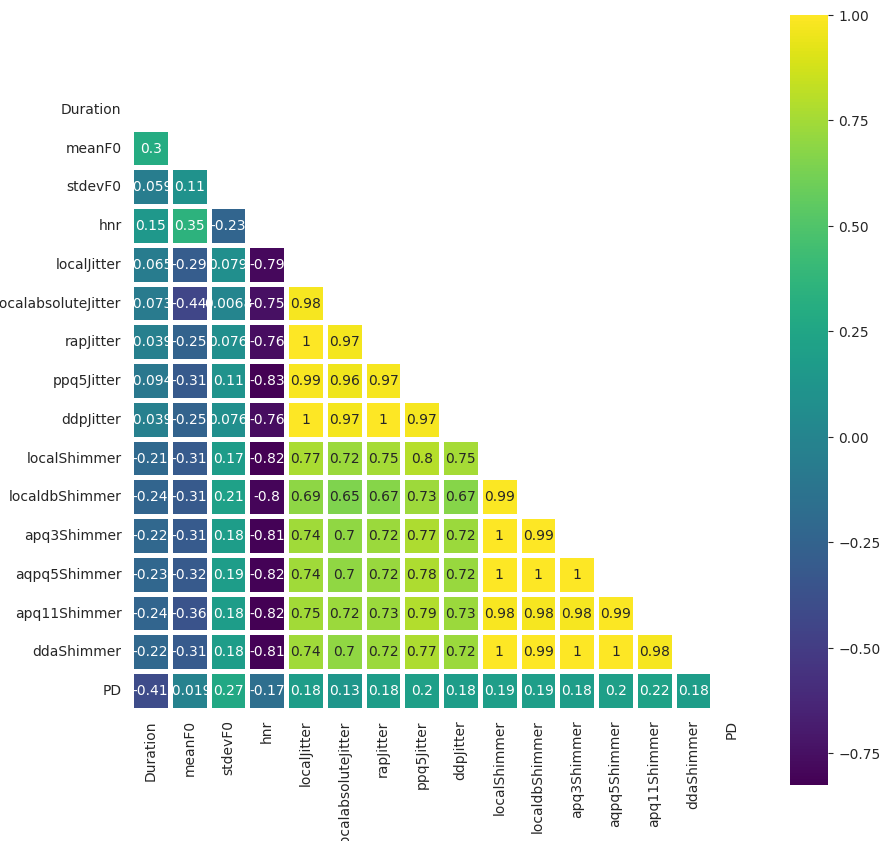

In [167]:
correlation = original_features_df.corr()
mask = np.zeros_like(correlation)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(10, 10))
    ax = sns.heatmap(correlation,mask=mask,square=True,linewidths=2.5,cmap="viridis",annot=True)

(16.5, -0.5)

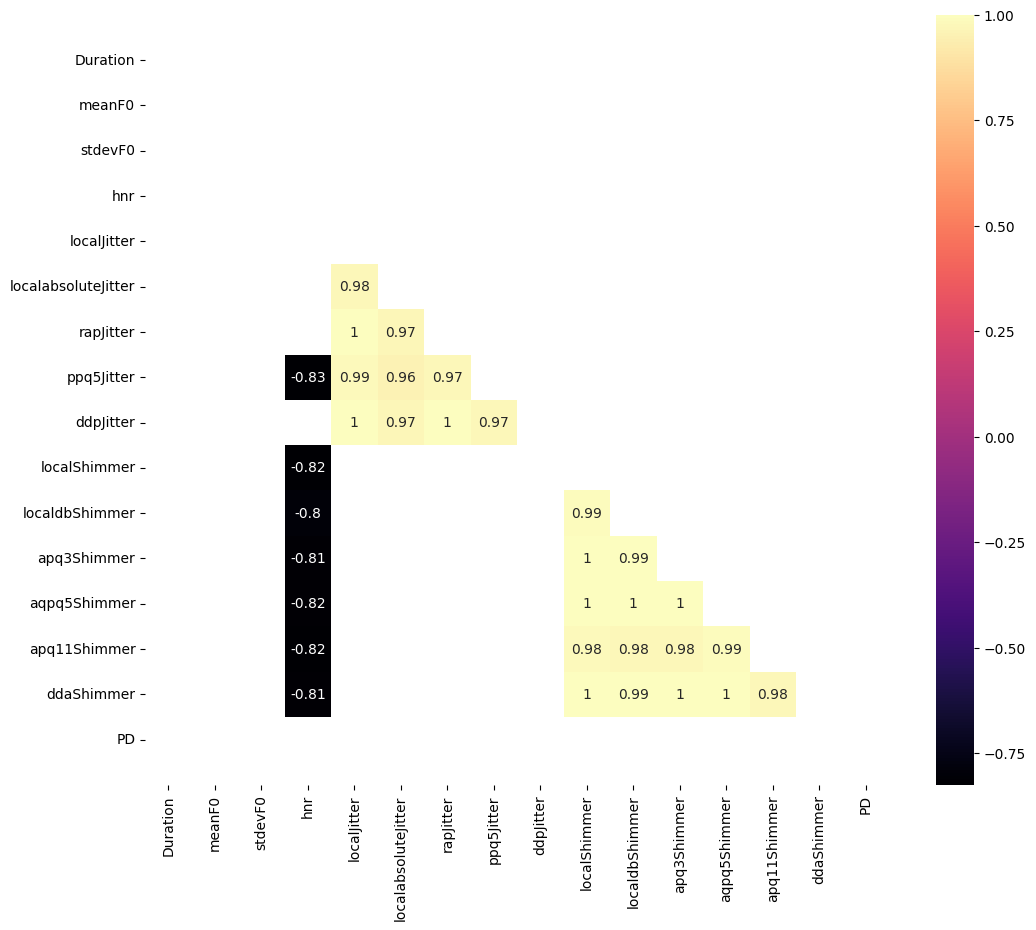

In [168]:
plt.figure(figsize=(12, 10))
df_corr = original_features_df.corr(method='pearson')
matrix = np.triu(df_corr)
ax = sns.heatmap(df_corr[(df_corr >= 0.80) | (df_corr <= -0.80)], annot=True, cmap='magma', mask=matrix)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [169]:
print("number of parkinson people in the dataset ",len(features_df.loc[features_df["PD"]==1]))
print("number of Healthy people in the dataset ",len(features_df.loc[features_df["PD"]==0]))

number of parkinson people in the dataset  95
number of Healthy people in the dataset  87


# Pre-processing

In [170]:
features_df

,Duration,meanF0,stdevF0,hnr,localJitter,localabsoluteJitter,rapJitter,ppq5Jitter,ddpJitter,localShimmer,localdbShimmer,apq3Shimmer,aqpq5Shimmer,apq11Shimmer,ddaShimmer,PD
0,15.499917,134.822642,4.955001,30.353702,0.003398,0.000025,0.001875,0.001990,0.005625,0.027721,0.245950,0.013838,0.022772,0.032128,0.041513,1.0
1,5.864750,154.846946,5.452601,21.604499,0.008849,0.000057,0.005094,0.005289,0.015281,0.077626,0.676717,0.044246,0.048661,0.055755,0.132738,1.0
2,11.304458,140.340022,1.962457,29.457190,0.008013,0.000057,0.004612,0.005177,0.013835,0.036308,0.316426,0.020482,0.024433,0.027846,0.061445,1.0
3,10.551250,125.452415,4.210881,24.631309,0.010270,0.000082,0.005292,0.005588,0.015876,0.062112,0.538971,0.035353,0.039316,0.051101,0.106058,1.0
4,17.828792,109.351063,7.814359,11.362872,0.023337,0.000213,0.013236,0.013840,0.039707,0.124065,0.966819,0.065415,0.077999,0.102519,0.196246,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177,19.569479,102.556881,1.007735,26.262665,0.003834,0.000037,0.002073,0.002279,0.006219,0.036251,0.322750,0.019753,0.025395,0.036984,0.059259,0.0
178,5.762417,153.877818,8.762624,22.722769,0.006457,0.000042,0.003547,0.003836,0.010641,0.057620,0.504674,0.032659,0.037659,0.043952,0.097977,0.0
179,30.578500,165.628700,2.807778,28.176643,0.003570,0.000022,0.001931,0.002079,0.005794,0.036591,0.332812,0.018337,0.023993,0.035551,0.055010,0.0
180,15.411646,118.919718,1.762181,22.888561,0.004952,0.000042,0.002652,0.002836,0.007955,0.062171,0.540577,0.034685,0.040050,0.046769,0.104055,0.0


In [171]:
features_df.drop('Duration', axis=1, inplace=True)

Drop the "Duration" column.

### Outlier treatment

In [172]:
def outliar_treatment(df):
    '''
    Any values greater than the whisker (3IQ) are set to the whisker value, 
    and any values lower than the LowerBound (1IQ) are set to the LowerBound.
    '''
    cols = list(df.columns)
    cols.remove('PD')
    for columnName in cols:
        Q1 = df[columnName].quantile(0.25)
        Q3 = df[columnName].quantile(0.75)
        IQR = Q3 - Q1
        whisker = Q1 + 1.5 * IQR
        LowerBound = Q1- 1.5 * IQR
        df[columnName] = df[columnName].apply(lambda x : whisker if x>whisker else x)
        df[columnName] = df[columnName].apply(lambda x : LowerBound if x<LowerBound else x)
    return df

In [173]:
removed_outliers = outliar_treatment(features_df)


In [174]:
def show_box_plots():
    plt.figure(figsize= (20,15))
    plt.subplot(5,5,1)
    sns.boxplot(removed_outliers["meanF0"],orient="v", color='lightblue')
    plt.xlabel('meanF0')

    plt.subplot(5,5,2)
    sns.boxplot(removed_outliers["stdevF0"],orient="v", color='lightblue')
    plt.xlabel('stdevF0')

    plt.subplot(5,5,3)
    sns.boxplot(removed_outliers["hnr"],orient="v", color='lightblue')
    plt.xlabel('hnr')

    plt.subplot(5,5,4)
    sns.boxplot(removed_outliers["localJitter"],orient="v", color='lightblue')
    plt.xlabel('localJitter')

    plt.subplot(5,5,5)
    sns.boxplot(removed_outliers["localabsoluteJitter"],orient="v", color='lightblue')
    plt.xlabel('localabsoluteJitter')

    plt.subplot(5,5,6)
    sns.boxplot(removed_outliers["rapJitter"],orient="v", color='lightblue')
    plt.xlabel('rapJitter')

    plt.subplot(5,5,7)
    sns.boxplot(removed_outliers["ppq5Jitter"],orient="v", color='lightblue')
    plt.xlabel('ppq5Jitter')

    plt.subplot(5,5,8)
    sns.boxplot(removed_outliers["ddpJitter"],orient="v", color='lightblue')
    plt.xlabel('ddpJitter')

    plt.subplot(5,5,9)
    sns.boxplot(removed_outliers["localShimmer"],orient="v", color='lightblue')
    plt.xlabel('localShimmer')

    plt.subplot(5,5,10)
    sns.boxplot(removed_outliers["localdbShimmer"],orient="v", color='lightblue')
    plt.xlabel('localdbShimmer')

    plt.subplot(5,5,11)
    sns.boxplot(removed_outliers["apq3Shimmer"],orient="v", color='lightblue')
    plt.xlabel('apq3Shimmer')

    plt.subplot(5,5,12)
    sns.boxplot(removed_outliers["aqpq5Shimmer"],orient="v", color='lightblue')
    plt.xlabel('aqpq5Shimmer')

    plt.subplot(5,5,13)
    sns.boxplot(removed_outliers["apq11Shimmer"],orient="v", color='lightblue')
    plt.xlabel('apq11Shimmer')

    plt.subplot(5,5,14)
    sns.boxplot(removed_outliers["ddaShimmer"],orient="v", color='lightblue')
    plt.xlabel('ddaShimmer')

if display_analysis:
    show_box_plots()


In [175]:
if display_analysis:
    get_kdeplots()

### checking and removing multi-colinearity

As displayed in the heatmap before, certain independent attributes have high correlations. Multicollinearity can be a problem for us, because we could not be able to determine the effects of each independent variables on the dependent variable.

We can compute the Variable Inflation Factors (VIF) score for each independent variable. It represents how well the variable can be explained by others. We can try to remove variables with high VIF scores in order to reduce multicollinearity.

In [176]:
reduced_features_df = removed_outliers.copy() #create a copy to perform the trials

def calc_vif(X):
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return(vif)

calc_vif(round(reduced_features_df,2))

/Users/tomas/Documents/Tese/Predictive-models-Parkinson/venv/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


,variables,VIF
0,meanF0,23.941359
1,stdevF0,5.178202
2,hnr,46.198136
3,localJitter,5.461763
4,localabsoluteJitter,NaN
5,rapJitter,22.654460
6,ppq5Jitter,13.907806
7,ddpJitter,56.911153
8,localShimmer,591.595926
9,localdbShimmer,1521.741764


(no VIF reduction applied)

In [177]:
#  reduced_features_df=reduced_features_df.drop(['rapJitter','localabsoluteJitter','ppq5Jitter'],axis=1)
#  calc_vif(round(reduced_features_df,2))

In [178]:
#  reduced_features_df=reduced_features_df.drop(['ddaShimmer'],axis=1)
#  calc_vif(round(reduced_features_df,2))

In [179]:
#  reduced_features_df=reduced_features_df.drop(['localShimmer'],axis=1)
#  calc_vif(round(reduced_features_df,2))

In [180]:
#  reduced_features_df=reduced_features_df.drop(['localdbShimmer'],axis=1)
#  calc_vif(round(reduced_features_df,2))

In [181]:
#  reduced_features_df=reduced_features_df.drop(['aqpq5Shimmer'],axis=1)
#  calc_vif(round(reduced_features_df,2))

In [182]:
#  reduced_features_df=reduced_features_df.drop(['meanF0'],axis=1)
#  calc_vif(round(reduced_features_df,2))

In [183]:
#  reduced_features_df=reduced_features_df.drop(['apq3Shimmer'],axis=1)
#  calc_vif(round(reduced_features_df,2))

We originally removed the variable with the highest VIF iteratively until all variables showed a low enough score (<10) <br>

In [184]:
def runPCA(df):
    #Z-score the Jitter and Shimmer measurements
    features = ['localJitter', 'localabsoluteJitter', 'rapJitter', 'ppq5Jitter', 'ddpJitter',
                'localShimmer', 'localdbShimmer', 'apq3Shimmer', 'aqpq5Shimmer', 'apq11Shimmer', 'ddaShimmer']
    # Separating out the features
    x = df.loc[:, features].values
    # Separating out the target
    #y = df.loc[:,['target']].values
    # Standardizing the features
    x = StandardScaler().fit_transform(x)
    #PCA
    pca = PCA(n_components=2)
    principalComponents = pca.fit_transform(x)
    principalDf = pd.DataFrame(data = principalComponents, columns = ['JitterPCA', 'ShimmerPCA'])
    principalDf
    return principalDf

# pcaData = runPCA(reduced_features_df)

# reduced_features_df = pd.concat([reduced_features_df.reset_index(drop=True),pcaData.reset_index(drop=True)], axis=1)

# reduced_features_df=reduced_features_df.drop(['localJitter', 'localabsoluteJitter', 'rapJitter', 'ppq5Jitter', 'ddpJitter',
#                 'localShimmer', 'localdbShimmer', 'apq3Shimmer', 'aqpq5Shimmer', 'apq11Shimmer', 'ddaShimmer'],axis=1)

PCA reduction not applied

In [185]:
reduced_features_df

,meanF0,stdevF0,hnr,localJitter,localabsoluteJitter,rapJitter,ppq5Jitter,ddpJitter,localShimmer,localdbShimmer,apq3Shimmer,aqpq5Shimmer,apq11Shimmer,ddaShimmer,PD
0,134.822642,4.955001,30.082433,0.003398,0.000025,0.001875,0.001990,0.005625,0.027721,0.245950,0.013838,0.022772,0.032128,0.041513,1.0
1,154.846946,5.452601,21.604499,0.008849,0.000057,0.005094,0.005289,0.015281,0.077626,0.676717,0.044246,0.048661,0.055755,0.132738,1.0
2,140.340022,1.962457,29.457190,0.008013,0.000057,0.004612,0.005177,0.013835,0.036308,0.316426,0.020482,0.024433,0.027846,0.061445,1.0
3,125.452415,4.210881,24.631309,0.010270,0.000082,0.005292,0.005588,0.015876,0.062112,0.538971,0.035353,0.039316,0.051101,0.106058,1.0
4,109.351063,7.814359,13.126565,0.010460,0.000086,0.005949,0.006339,0.017846,0.101913,0.883600,0.057406,0.064236,0.072758,0.172217,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177,102.556881,1.007735,26.262665,0.003834,0.000037,0.002073,0.002279,0.006219,0.036251,0.322750,0.019753,0.025395,0.036984,0.059259,0.0
178,153.877818,8.762624,22.722769,0.006457,0.000042,0.003547,0.003836,0.010641,0.057620,0.504674,0.032659,0.037659,0.043952,0.097977,0.0
179,165.628700,2.807778,28.176643,0.003570,0.000022,0.001931,0.002079,0.005794,0.036591,0.332812,0.018337,0.023993,0.035551,0.055010,0.0
180,118.919718,1.762181,22.888561,0.004952,0.000042,0.002652,0.002836,0.007955,0.062171,0.540577,0.034685,0.040050,0.046769,0.104055,0.0


In [186]:
#reduced_features_df=reduced_features_df.drop(['PD'],axis=1)

In [187]:
features = dataset + '_features.csv'
reduced_features = dataset + '_reduced_features.csv'

outdir = '../data/tables/'
if not os.path.exists(outdir):
    os.mkdir(outdir)

original_features_df.to_csv(os.path.join(outdir, features),index=False)
reduced_features_df.to_csv(os.path.join(outdir, reduced_features),index=False)

Numerical features are standardized and saved to csv files